<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

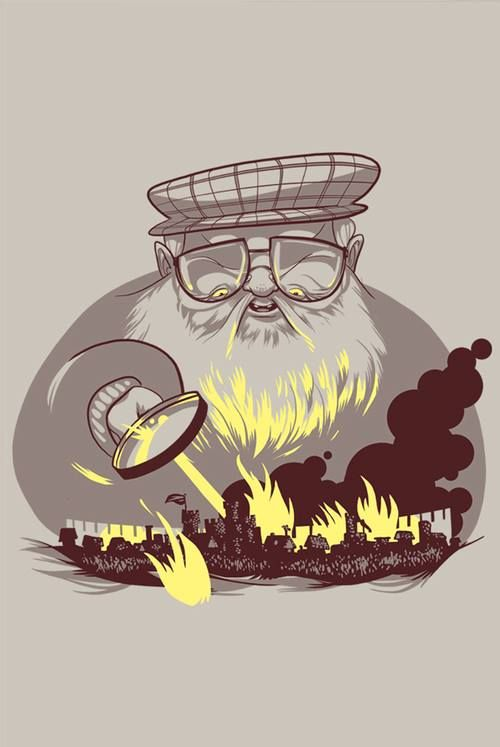

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test.csv
100% 38.3k/38.3k [00:00<00:00, 56.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train.csv
100% 141k/141k [00:00<00:00, 77.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")
data_train


,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Seaworth,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

Прежде чем удалять или заменять данные определим, какой процент данных пропущен, для каждой колонки

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

In [5]:
len_train_data = len(data_train)

In [6]:
len_train_data = len(data_train)
def num_creat_in_percent(num) -> float:
  return num / len_train_data
Series_Nan = data_train.isna().sum()
Sereis_without_zeros = (Series_Nan[data_train.isna().sum() > 0]).apply(num_creat_in_percent)
Sereis_without_zeros

,0
title,0.539499
culture,0.686577
dateOfBirth,0.820809
DateoFdeath,0.802826
mother,0.988439
father,0.985870
heir,0.986513
house,0.244701
spouse,0.871548
isAliveMother,0.988439


Для данных пропуск которых больше 85%, будем удалять данные поскольку, данный признак если заполнить пропускам будет искажать модель

In [7]:
list_del = Sereis_without_zeros[Sereis_without_zeros > 0.85].index.to_list()

In [8]:
list_del

['mother',
 'father',
 'heir',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [9]:
data_train.drop(columns=list_del, axis=1, inplace=True)
data_train

,name,title,male,culture,dateOfBirth,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,1,0,1,1,0,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,1,1,0,0,0,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.076923,0


Данные по возрасту заменим медианным значением пропуски для числовых значений и модой для категориальных


In [10]:
list_del_not_zeros = data_train.isna().sum()[data_train.isna().sum() > 0].index.to_list()

In [11]:
list_del_not_zeros

['title', 'culture', 'dateOfBirth', 'DateoFdeath', 'house', 'age']

Исходя из анализа по info выше понимаем что title, culture, house - категориальные переменные, age - числовое, годы рождения выкинем из рассмотрения.

In [12]:
list_del_not_zeros_categorial = ['culture', 'house']
list_del_not_zeros_numeric = ["age"]

In [13]:
data_train.drop(["dateOfBirth", "DateoFdeath"], axis=1, inplace=True)

Заменим категориальные признаки модой

In [14]:
for num_col in list_del_not_zeros_categorial:
  mode_feat = data_train[num_col].mode()[0]
  data_train[num_col].fillna(mode_feat, inplace=True)

Заменим числовые признаки медианой

In [15]:
for num_col in list_del_not_zeros_numeric:
  mode_feat = data_train[num_col].median()
  data_train[num_col].fillna(mode_feat, inplace=True)

Проверим пропуски

In [16]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0


In [17]:
def title_from_sex(df):
    list_sex = df["male"].unique().tolist()

    # Для мужчин
    data_train_male = df[df["male"] == list_sex[0]]
    mode_feat_male = data_train_male["title"].mode()[0]
    print(mode_feat_male)
    df.loc[(df["male"] == list_sex[0]) & (df["title"].isna()), "title"] = mode_feat_male

    # Для женщин
    data_train_female = df[df["male"] == list_sex[1]]
    mode_feat_female = data_train_female["title"].mode()[0]
    print(mode_feat_male)
    df.loc[(df["male"] == list_sex[1]) & (df["title"].isna()), "title"] = mode_feat_female

    return df


In [18]:
title_from_sex(data_train)

Ser
Ser


,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,House Frey,0,0,0,0,0,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,House Frey,1,0,1,1,0,0,1,24.0,0,0.160535,1
1554,Masha Heddle,Ser,0,Northmen,House Frey,1,1,0,0,0,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,Ser,1,Northmen,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0


In [19]:
data_train.isna().sum()

,0
name,0
title,0
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [20]:
def ispopular(num) -> int:
  result = 0
  if num >= 0.5:
    result = 1
  return result


In [21]:
data_train["isPopular"] = data_train["popularity"].apply(ispopular)

In [22]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [23]:
# Функция для поиска соответствия по словарю cult
def find_cult(text):
    for key, values in cult.items():
        for word in values:
           if word == text.lower():
            return key
    return text

In [24]:
data_train['culture'] = data_train['culture'].apply(find_cult)
data_train

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,House Frey,0,0,0,0,0,0,0,24.0,11,0.605351,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1,0
4,Aemma Arryn,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,House Frey,1,0,1,1,0,0,1,24.0,0,0.160535,1,0
1554,Masha Heddle,Ser,0,Northmen,House Frey,1,1,0,0,0,0,0,24.0,0,0.040134,0,0
1555,Matthos Seaworth,Ser,1,Northmen,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0,0


In [25]:
def isnumDeadRelations(num) -> int:
  result = 0
  if num > 0:
    result = 1
  return result

In [26]:
data_train["numDeadRelations"] = data_train["numDeadRelations"].apply(isnumDeadRelations)

In [27]:
data_train.drop("popularity", axis=1, inplace=True)

In [28]:
data_train

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,House Frey,0,0,0,0,0,0,0,24.0,1,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Addison Hill,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,24.0,0,1,0
4,Aemma Arryn,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,House Frey,1,0,1,1,0,0,1,24.0,0,1,0
1554,Masha Heddle,Ser,0,Northmen,House Frey,1,1,0,0,0,0,0,24.0,0,0,0
1555,Matthos Seaworth,Ser,1,Northmen,House Seaworth,0,1,1,1,1,0,0,24.0,0,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [29]:
data_train.drop(columns=["name"], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [30]:
data_train["isAlive"].value_counts()

,count
isAlive,
1,1212
0,345


Видно что целевая перменная применяет два значения, значит задача бинарной классификации и она является категориальной, также виден дизбаланс классов

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   object 
 1   male              1557 non-null   int64  
 2   culture           1557 non-null   object 
 3   house             1557 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               1557 non-null   float64
 12  numDeadRelations  1557 non-null   int64  
 13  isAlive           1557 non-null   int64  
 14  isPopular         1557 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 194.6+ KB


Видно что 4 колонки яляются категориальной, также мы постарались обьеденить классы поэтому буду применять one-hot encoding

In [32]:
#Найдем только категориальные переменные
cat_featers = data_train.select_dtypes(include="object")
num_featers = data_train.select_dtypes(exclude="object")


In [33]:
cat_featers = pd.get_dummies(cat_featers, drop_first=True)

In [34]:

cat_featers

,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,title_Brightwater,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
cat_featers = pd.get_dummies(cat_featers, drop_first=True)
result_data = pd.concat([cat_featers,num_featers],axis=1)
result_data

,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,title_Brightwater,...,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,24.0,1,0,1
2,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,1,1,97.0,1,1,1
3,False,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,1,24.0,0,1,0
4,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,1,23.0,0,0,0
5,False,False,False,False,False,False,False,False,False,False,...,0,0,1,0,1,1,29.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,True,False,False,False,False,False,False,False,False,False,...,0,1,1,0,0,1,24.0,0,1,0
1554,False,False,False,False,False,False,False,False,False,False,...,1,0,0,0,0,0,24.0,0,0,0
1555,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,0,0,24.0,0,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Анализировать будем датафрейм до применения one-hot-encoding


In [36]:
data_train

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular
S.No,,,,,,,,,,,,,,,
1,Ser,1,Northmen,House Frey,0,0,0,0,0,0,0,24.0,1,0,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,24.0,0,1,0
4,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,House Frey,1,0,1,1,0,0,1,24.0,0,1,0
1554,Ser,0,Northmen,House Frey,1,1,0,0,0,0,0,24.0,0,0,0
1555,Ser,1,Northmen,House Seaworth,0,1,1,1,1,0,0,24.0,0,0,0


Посмотрим как влияет тутл на целевую перменную

In [37]:
data_train["title"].value_counts()

,count
title,
Ser,1146
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetsister,1
Sweetport Sound,1
Lord of Greyshield,1


<ipython-input-38-88117c1df265>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='isAlive', data=title_alive_percent, palette='viridis')


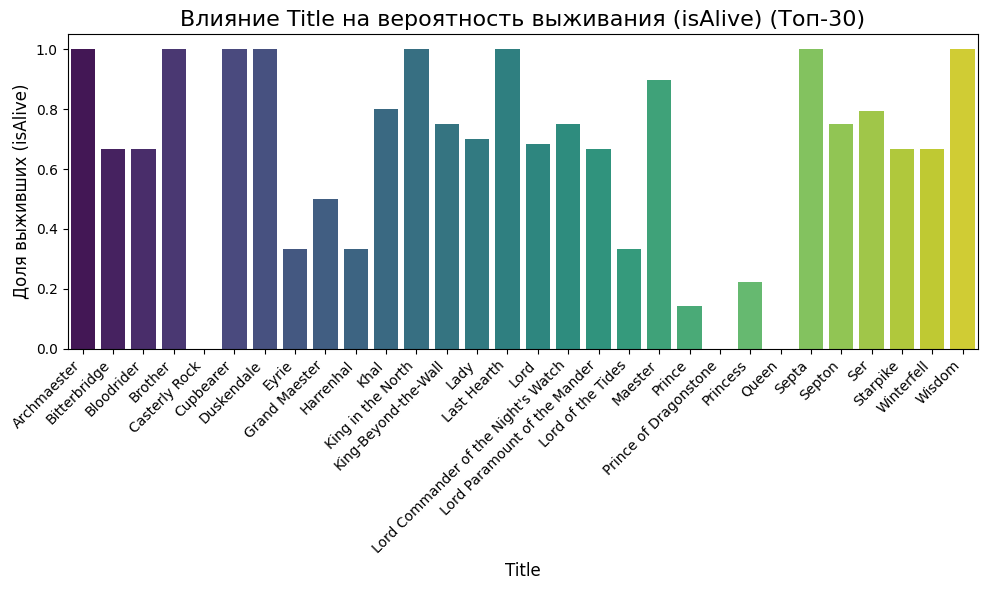

In [38]:
top_30_titles = data_train['title'].value_counts().head(30).index
df_top_30 = data_train[data_train['title'].isin(top_30_titles)]
title_alive_percent = df_top_30.groupby('title')['isAlive'].mean().reset_index()

# Визуализация через барплот
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='isAlive', data=title_alive_percent, palette='viridis')
plt.title('Влияние Title на вероятность выживания (isAlive) (Топ-30)', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Доля выживших (isAlive)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.tight_layout()
plt.show()

Видно что многие титул имеет опредленную корреляцию с признаком

In [39]:
num_featers.corr()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular
male,1.000000,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,0.049588,0.039540,-0.148290,0.080518
book1,0.050526,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.017256,0.139291,-0.112468,0.074789
book2,0.024079,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,-0.017150,0.055850,-0.055998,0.001636
book3,-0.008100,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.030002,0.032889,0.018427,-0.026356
book4,-0.101674,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.064155,-0.024038,0.284014,-0.061401
book5,0.023022,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.010069,0.094381,0.032531,0.000907
isMarried,-0.094385,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,0.180252,0.197150,-0.049381,0.022525
isNoble,0.133807,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.152249,0.054631,-0.060572,-0.038279
age,0.049588,0.017256,-0.017150,-0.030002,-0.064155,0.010069,0.180252,0.152249,1.000000,0.107943,-0.179331,0.025676
numDeadRelations,0.039540,0.139291,0.055850,0.032889,-0.024038,0.094381,0.197150,0.054631,0.107943,1.000000,-0.178177,0.545175


<ipython-input-40-699a6c758238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='male', y='isAlive', data=title_alive_percent, palette='viridis')


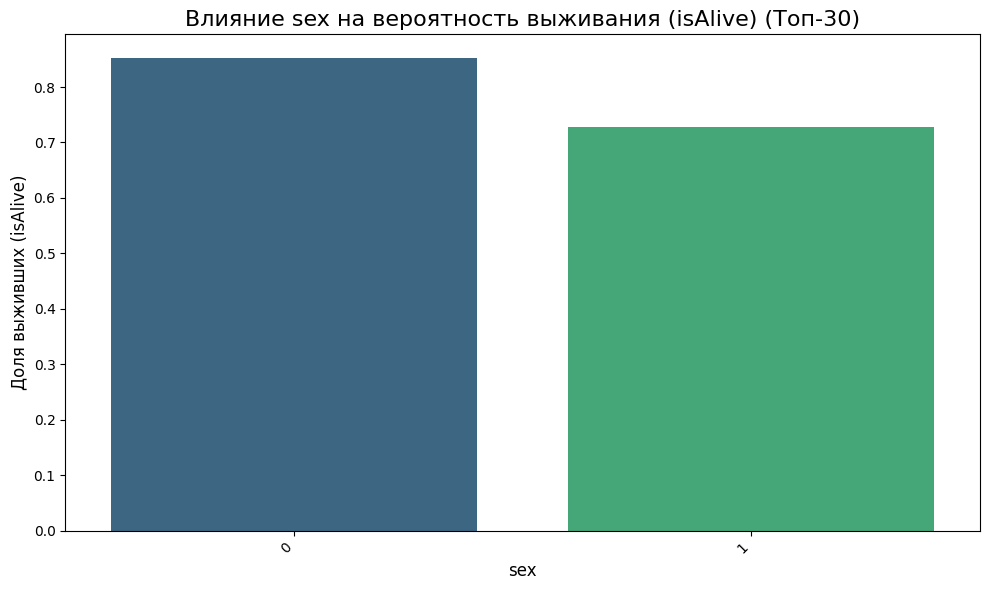

In [40]:
title_alive_percent = data_train.groupby('male')['isAlive'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='male', y='isAlive', data=title_alive_percent, palette='viridis')
plt.title('Влияние sex на вероятность выживания (isAlive) (Топ-30)', fontsize=16)
plt.xlabel('sex', fontsize=12)
plt.ylabel('Доля выживших (isAlive)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.tight_layout()
plt.show()

Также видно что женщины выживают чаще

<ipython-input-41-c289a41b8af9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book', y='alive_rate', data=book_alive_percent, palette='coolwarm')


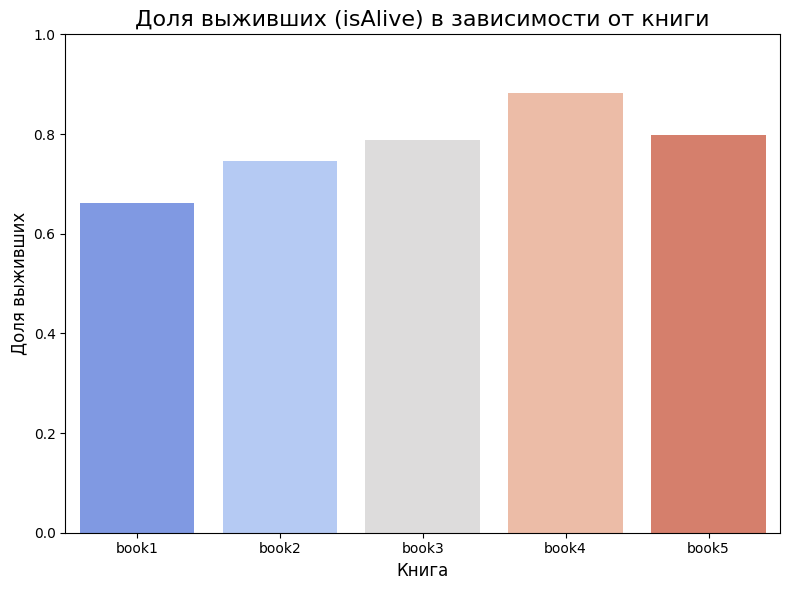

In [41]:

# Создаём новый DataFrame с колонками для каждой книги
books_cols = ['book1', 'book2', 'book3', 'book4', 'book5']

# Подсчёт доли выживших по каждой книге
book_alive_percent = pd.DataFrame({
    'book': books_cols,
    'alive_rate': [data_train.groupby(book)['isAlive'].mean()[1] for book in books_cols]  # [1] - означает присутствие в книге
})

# Построение барплота
plt.figure(figsize=(8, 6))
sns.barplot(x='book', y='alive_rate', data=book_alive_percent, palette='coolwarm')

# Добавляем подписи и заголовок
plt.title('Доля выживших (isAlive) в зависимости от книги', fontsize=16)
plt.xlabel('Книга', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)  # Лимит для доли от 0 до 1
plt.tight_layout()
plt.show()


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

Стандартирзруем колонку age

In [42]:
# Предположим, у вас есть датафрейм df, и вы хотите стандартизировать колонку 'target_column'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Стандартизируем только одну колонку
result_data['age'] = scaler.fit_transform(result_data[['age']])

In [43]:
X = result_data.drop("isAlive", axis=1)
y = result_data["isAlive"]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [46]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [47]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [48]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [49]:
models = {
    "AdaBoost": AdaBoostClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianProcess": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier()
}
def teach(model):
    model.fit(X_train, y_train)
    return model.predict(X_test)

results = {}

for model_name, model in models.items():
    predictions = teach(model)
    results[model_name] = predictions


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [50]:
results

{'AdaBoost': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 

In [51]:
results["RandomForest"]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [52]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [53]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [54]:
def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


In [55]:
for model_name, result in results.items():
    accuracy = calculate_accuracy(y_test, result)
    print(f"Model - {model_name}" )
    print("Accuracy : %.4f" % accuracy)
    print('|||||||||||||||||||')

Model - AdaBoost
Accuracy : 0.7885
|||||||||||||||||||
Model - RandomForest
Accuracy : 0.8141
|||||||||||||||||||
Model - GaussianProcess
Accuracy : 0.7981
|||||||||||||||||||
Model - GaussianNB
Accuracy : 0.4231
|||||||||||||||||||
Model - KNeighbors
Accuracy : 0.7917
|||||||||||||||||||
Model - SVC
Accuracy : 0.7853
|||||||||||||||||||
Model - DecisionTree
Accuracy : 0.7885
|||||||||||||||||||


Выберите лучшую модель.

Тут random forest дал максимальные значения

Продвинутое решение, используем optuna и catboost, так как задача бинарной классификации, метрикой будет roc-auc, так как классы не сбалансированны

In [56]:
pip install optuna catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [57]:
import optuna
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.utils import class_weight

In [58]:
# Вычисление весов классов для обработки дисбаланса
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

def objective(trial):
    # Определение гиперпараметров для оптимизации
    params = {
        'iterations': trial.suggest_int('iterations', 50, 200),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'loss_function': 'Logloss',
        'class_weights': class_weights_dict,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

# Вывод лучших гиперпараметров
print("Best hyperparameters:", study.best_params)
print("Best ROC-AUC:", study.best_value)

# Обучение модели с лучшими гиперпараметрами для оценки точности
best_model = CatBoostClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовых данных для оценки точности
y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

[I 2024-09-27 17:44:57,207] A new study created in memory with name: no-name-64ade932-fcb9-41f9-b352-6d91ffeaa80e
<ipython-input-58-65b92d4a9e66>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1),
<ipython-input-58-65b92d4a9e66>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
[I 2024-09-27 17:44:58,427] Trial 0 finished with value: 0.7797757499850898 and parameters: {'iterations': 177, 'depth': 8, 'learning_rate': 0.03268991105568881, 'l2_leaf_reg': 0.001905966379756993}. Best is trial 0 with value: 0.7797757499850898.
<ipython-input-58

Best hyperparameters: {'iterations': 138, 'depth': 10, 'learning_rate': 0.18029410183116723, 'l2_leaf_reg': 2.413194362268919}
Best ROC-AUC: 0.8375678415936064
0:	learn: 0.5978741	total: 16.2ms	remaining: 2.21s
1:	learn: 0.5354289	total: 32.2ms	remaining: 2.19s
2:	learn: 0.4966389	total: 50ms	remaining: 2.25s
3:	learn: 0.4775761	total: 55.9ms	remaining: 1.87s
4:	learn: 0.4488635	total: 71.4ms	remaining: 1.9s
5:	learn: 0.4283410	total: 87.3ms	remaining: 1.92s
6:	learn: 0.4172332	total: 103ms	remaining: 1.92s
7:	learn: 0.4126192	total: 106ms	remaining: 1.72s
8:	learn: 0.4063656	total: 121ms	remaining: 1.74s
9:	learn: 0.4034167	total: 126ms	remaining: 1.61s
10:	learn: 0.3962256	total: 141ms	remaining: 1.63s
11:	learn: 0.3905709	total: 156ms	remaining: 1.64s
12:	learn: 0.3878443	total: 161ms	remaining: 1.55s
13:	learn: 0.3808093	total: 180ms	remaining: 1.59s
14:	learn: 0.3729692	total: 196ms	remaining: 1.6s
15:	learn: 0.3654645	total: 211ms	remaining: 1.61s
16:	learn: 0.3620819	total: 226m

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [59]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 14.1MB/s]


In [60]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [61]:
#дообработаем тестовые данные, теперь обучим на полном датасете train, и сделаем predict

In [62]:
X_train

,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,title_Brightwater,...,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1548,False,False,False,False,False,False,False,False,False,False,...,1,1,1,0,0,0,1,-0.169265,0,0
1062,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,-0.169265,0,0
981,False,False,False,False,False,False,False,False,False,False,...,1,1,1,0,1,1,0,-0.169265,0,0
1150,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,1,-0.169265,0,0
1409,False,False,False,False,False,False,False,False,False,False,...,0,0,1,1,0,0,1,-0.169265,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,-0.169265,0,0
1193,False,False,False,False,False,False,False,False,False,False,...,0,1,1,1,1,0,1,-0.169265,0,0
227,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,0,-0.169265,0,0


In [63]:
def correct_test_data(df):
  #step_1
  df.drop(columns=list_del, axis=1, inplace=True)
  df.drop(["dateOfBirth", "DateoFdeath"], axis=1, inplace=True)
  #step_2
  for num_col in list_del_not_zeros_categorial:
    mode_feat = data_train[num_col].mode()[0]
    df[num_col].fillna(mode_feat, inplace=True)
  #step_3
  for num_col in list_del_not_zeros_numeric:
    mode_feat = data_train[num_col].median()
    df[num_col].fillna(mode_feat, inplace=True)
  #step_4
  data_train_male = data_train[data_train["male"] == 1]
  mode_feat_male = data_train_male["title"].mode()[0]
  df.loc[df["title"].isna(), "title"] = mode_feat_male
  #step_5
  df["isPopular"] = df["popularity"].apply(ispopular)
  df['culture'] = df['culture'].apply(find_cult)
  df["numDeadRelations"] = data_train["numDeadRelations"].apply(isnumDeadRelations)
  df.drop("popularity", axis=1, inplace=True)
  df.drop(columns=["name"], inplace = True)
  #step_6
  cat_featers = df.select_dtypes(include="object")
  num_featers = df.select_dtypes(exclude="object")
  cat_featers = pd.get_dummies(cat_featers, drop_first=True)
  result_data = pd.concat([cat_featers,num_featers],axis=1)
  scaler = StandardScaler()
# Стандартизируем только одну колонку
  result_data['age'] = scaler.fit_transform(result_data[['age']])
  return result_data


In [64]:
result_data_test = correct_test_data(data_test)
result_data_test

,title_Andals,title_Arbor,title_Barrowton,title_Bear Island,title_Black Wind,title_Blacktyde,title_Bloodrider,title_Brightwater,title_Captain-General,title_Castellan,...,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1558,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0.075235,NaN,0
1559,False,False,False,False,False,False,False,False,False,False,...,0,1,1,1,1,0,0,0.071547,NaN,1
1560,False,False,False,False,False,False,False,False,False,False,...,0,0,1,1,0,0,0,0.071547,NaN,0
1561,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,1,0,1,0.071547,NaN,0
1562,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,1,1,0,0.072227,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,1,0,0,0.071547,NaN,0
1943,False,False,False,False,False,False,False,False,False,False,...,0,1,0,1,1,0,0,0.071547,NaN,0
1944,False,False,False,False,False,False,False,False,False,False,...,1,1,1,1,1,0,0,0.071547,NaN,0


In [65]:
result_data_test.shape

(389, 290)

In [66]:
result_data.shape

(1557, 553)

Из-за one-hot-encoding разные данные массива, исправим это

In [67]:
cols_to_add = result_data.columns.tolist()

# Находим недостающие колонки, которые есть в df2, но отсутствуют в df1
missing_cols = [col for col in cols_to_add if col not in result_data_test.columns]

# Добавляем недостающие колонки в df1, заполняя их значениями False
for col in missing_cols:
    result_data_test[col] = False

# Упорядочиваем колонки в df1, чтобы они соответствовали df2
result_data_test = result_data_test[cols_to_add]

<ipython-input-67-fef5e125681c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_data_test[col] = False
<ipython-input-67-fef5e125681c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_data_test[col] = False
<ipython-input-67-fef5e125681c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [68]:
result_data_test.isna().sum()

,0
title_Archmaester,0
title_Ashford,0
title_Banefort,0
title_Big BucketThe Wull,0
title_Bitterbridge,0
...,...
isNoble,0
age,0
numDeadRelations,389
isAlive,0


Видно что в колонке есть 389 Nan, исправим это

In [69]:
result_data_test["numDeadRelations"] = 0

<ipython-input-69-e0920215d7a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_data_test["numDeadRelations"] = 0


наконец сделаем predict

In [82]:
y_pred = best_model.predict(result_data_test)


In [83]:

y_pred_reshaped = y_pred.reshape(-1, 1)  # Изменяем форму на (389, 1)

# Заменяем все значения в DataFrame на значения из y_pred
submission.iloc[:, :] = y_pred_reshaped
submission.to_csv("/content/new_submission.csv", index=False)

In [72]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [84]:
submission.to_csv("/content/new_submission.csv", index=False)

def save_file(array):
  

In [118]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")
data_train

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Seaworth,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [119]:
data_train['DateoFdeath'] = data_train['DateoFdeath'].apply(lambda x: 0 if pd.isna(x) else 1)
data_test['DateoFdeath'] = data_test['DateoFdeath'].apply(lambda x: 0 if pd.isna(x) else 1)

In [120]:
len_train_data = len(data_train)
def num_creat_in_percent(num) -> float:
  return num / len_train_data
Series_Nan = data_train.isna().sum()
Sereis_without_zeros = (Series_Nan[data_train.isna().sum() > 0]).apply(num_creat_in_percent)
list_del = Sereis_without_zeros[Sereis_without_zeros > 0.7].index.to_list()


In [121]:
data_train.drop(columns=list_del, axis=1, inplace=True)
data_test.drop(columns=list_del, axis=1, inplace=True)

In [124]:
data_train.select_dtypes(include="object").columns

Index(['title', 'culture', 'house'], dtype='object')

In [123]:
data_train.drop("name", axis=1, inplace=True)
data_test.drop("name", axis=1, inplace=True)

In [95]:
import catboost
from sklearn.model_selection import GridSearchCV

In [125]:
cat_features = data_train.select_dtypes(include="object").columns.to_list()

In [126]:
boosting_model = catboost.CatBoostClassifier(n_estimators=30, silent=True, eval_metric='Accuracy', cat_features=cat_features)

param_grid = {
    'learning_rate':np.arange(0.1,1,0.2),
    'depth':[2, 5, 8, 10],
    'l2_leaf_reg': np.linspace(1, 10, 10)
}

grid = GridSearchCV(estimator = boosting_model,
                    param_grid = param_grid,
                    cv = 5
)


In [127]:
data_train.fillna('NaN', inplace=True)

In [128]:
data_test.fillna('NaN', inplace=True)

In [129]:
X_new, y_new = data_train.drop("isAlive", axis=1), data_train["isAlive"]

In [130]:
grid.fit(X_new, y_new, cat_features=cat_features, verbose = False)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7acd9e852470>,
             param_grid={'depth': [2, 5, 8, 10],
                         'l2_leaf_reg': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])})

In [131]:
best_rf_model = grid.best_estimator_
y_pred = best_rf_model.predict(data_test)

In [132]:
y_pred_reshaped = y_pred.reshape(-1, 1)  # Изменяем форму на (389, 1)
# Заменяем все значения в DataFrame на значения из y_pred
submission.iloc[:, :] = y_pred_reshaped
submission.to_csv("/content/new_submission.csv", index=False)

Данный предикт дал результат в 97%, поэтому на этом решение заканчивается